In [15]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [16]:
# Load data from CSV file
data = pd.read_csv('../../../Dataset/ADBE_Stock.csv')

# Tiền xử lí dữ liệu
# Hàm chuyển đổi "Vol." từ chuỗi sang số
def convert_volume_to_number(volume_str):
    if volume_str[-1] == 'K':
        return int(float(volume_str[:-1]) * 1000)
    elif volume_str[-1] == 'M':
        return int(float(volume_str[:-1]) * 1000000)
    elif volume_str[-1] == 'B':
        return int(float(volume_str[:-1]) * 1000000000)
    else:
        return int(volume_str)

data

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,3/1/2019,ADBE,264.010010,264.010010,266.239990,261.500000,265.750000,2594000
1,3/4/2019,ADBE,258.160004,258.160004,267.000000,254.080002,266.700012,2994900
2,3/5/2019,ADBE,257.380005,257.380005,259.869995,256.369995,259.000000,2101800
3,3/6/2019,ADBE,256.399994,256.399994,259.489990,253.839996,257.399994,1950500
4,3/7/2019,ADBE,255.460007,255.460007,257.489990,253.289993,255.770004,3185200
...,...,...,...,...,...,...,...,...
1319,5/28/2024,ADBE,478.429993,478.429993,478.670013,469.600006,473.010010,2575300
1320,5/29/2024,ADBE,477.600006,477.600006,482.790008,472.600006,472.779999,2214800
1321,5/30/2024,ADBE,445.869995,445.869995,466.820007,444.839996,464.899994,5606900
1322,5/31/2024,ADBE,444.760010,444.760010,448.230011,433.970001,447.720001,7487500


In [17]:
data.describe

<bound method NDFrame.describe of            Date Symbol   Adj Close       Close        High         Low  \
0      3/1/2019   ADBE  264.010010  264.010010  266.239990  261.500000   
1      3/4/2019   ADBE  258.160004  258.160004  267.000000  254.080002   
2      3/5/2019   ADBE  257.380005  257.380005  259.869995  256.369995   
3      3/6/2019   ADBE  256.399994  256.399994  259.489990  253.839996   
4      3/7/2019   ADBE  255.460007  255.460007  257.489990  253.289993   
...         ...    ...         ...         ...         ...         ...   
1319  5/28/2024   ADBE  478.429993  478.429993  478.670013  469.600006   
1320  5/29/2024   ADBE  477.600006  477.600006  482.790008  472.600006   
1321  5/30/2024   ADBE  445.869995  445.869995  466.820007  444.839996   
1322  5/31/2024   ADBE  444.760010  444.760010  448.230011  433.970001   
1323   6/3/2024   ADBE  439.019989  439.019989  449.839996  436.579987   

            Open   Volume  
0     265.750000  2594000  
1     266.700012  299

In [18]:
data.info

<bound method DataFrame.info of            Date Symbol   Adj Close       Close        High         Low  \
0      3/1/2019   ADBE  264.010010  264.010010  266.239990  261.500000   
1      3/4/2019   ADBE  258.160004  258.160004  267.000000  254.080002   
2      3/5/2019   ADBE  257.380005  257.380005  259.869995  256.369995   
3      3/6/2019   ADBE  256.399994  256.399994  259.489990  253.839996   
4      3/7/2019   ADBE  255.460007  255.460007  257.489990  253.289993   
...         ...    ...         ...         ...         ...         ...   
1319  5/28/2024   ADBE  478.429993  478.429993  478.670013  469.600006   
1320  5/29/2024   ADBE  477.600006  477.600006  482.790008  472.600006   
1321  5/30/2024   ADBE  445.869995  445.869995  466.820007  444.839996   
1322  5/31/2024   ADBE  444.760010  444.760010  448.230011  433.970001   
1323   6/3/2024   ADBE  439.019989  439.019989  449.839996  436.579987   

            Open   Volume  
0     265.750000  2594000  
1     266.700012  29949

In [19]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:2:1
df = data
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.75 * len(df))
test_size = len(df) - train_size

train_data = df[:train_size]
test_data = df[train_size:]

In [20]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7379.180, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7386.416, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7375.531, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7376.738, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7384.561, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=7375.178, Time=0.13 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=7376.696, Time=0.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=7376.981, Time=0.32 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7375.227, Time=0.23 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=7377.772, Time=0.55 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=7373.342, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=7373.712, Time=0.02 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=7374.868, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=7375.147, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0]          

ARIMA(order=(2, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [21]:
# 4. Quá trình testing 
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))


In [22]:
# Tính MAPE
def calculate_mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#  Tính MAE
def calculate_mae(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    mae = np.mean(np.abs(y_true - y_pred))
    return mae

# Tính toán RMSE, MAPE và MDA
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
test_mape = calculate_mape(y_test, y_pred)
test_mae = calculate_mae(y_test, y_pred)

# In kết quả
print('Testing RMSE:', test_rmse)
print('Testing MAPE:', test_mape)
print('Testing MAE:', test_mae)

Testing RMSE: 141.94473757606278
Testing MAPE: 22.90667670272269
Testing MAE: 122.58448189132159


In [23]:
# 5. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data_30 = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[382.69299661 383.23402827 383.12062396 383.15927724 383.14956943
 383.15250422 383.15171356 383.15194216 383.15187889 383.15189688
 383.15189185 383.15189327 383.15189287 383.15189299 383.15189295
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296]


In [24]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_60 = pd.RangeIndex(start=last_index, stop=last_index+60, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index+1, last_index+61)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(n_periods=len(x_next_60_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)

Predicted closing prices for the next 60 days:
[382.69299661 383.23402827 383.12062396 383.15927724 383.14956943
 383.15250422 383.15171356 383.15194216 383.15187889 383.15189688
 383.15189185 383.15189327 383.15189287 383.15189299 383.15189295
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296]


In [25]:
# 6. Quá trình tạo index predict 60 ngày tiếp theo
last_index =  df.index[-1]
last_data_90 = pd.RangeIndex(start=last_index, stop=last_index+90, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index+1, last_index+91)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(n_periods=len(x_next_90_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)

Predicted closing prices for the next 90 days:
[382.69299661 383.23402827 383.12062396 383.15927724 383.14956943
 383.15250422 383.15171356 383.15194216 383.15187889 383.15189688
 383.15189185 383.15189327 383.15189287 383.15189299 383.15189295
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 383.15189296 383.15189296 383.15189296
 383.15189296 383.15189296 38

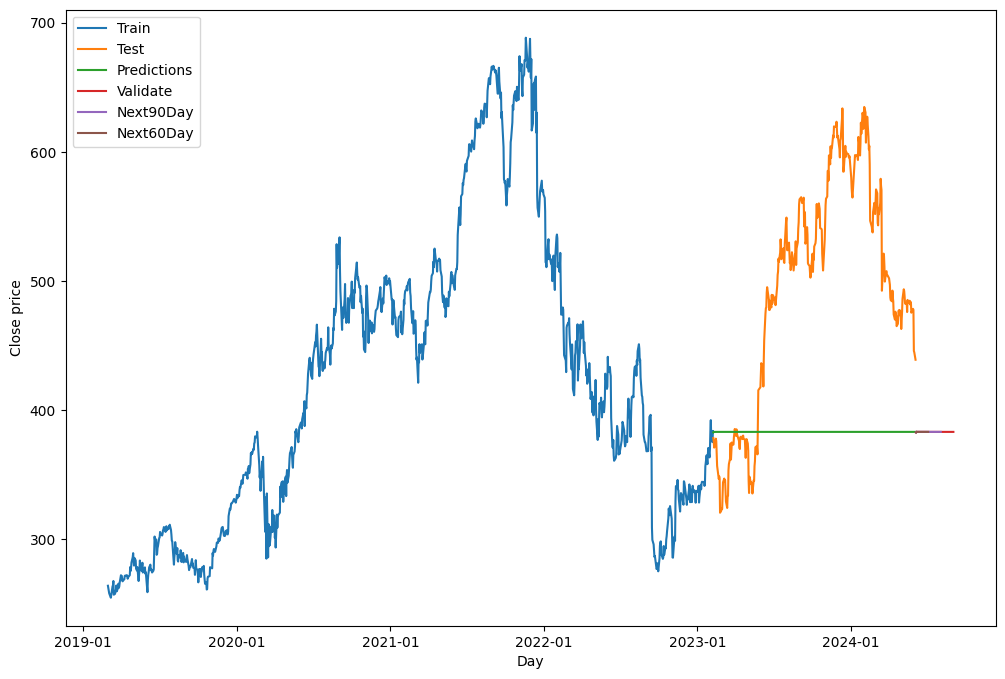

In [26]:
# 8.Vẽ hình
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][:train_size], train_data['Close'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Train', 'Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

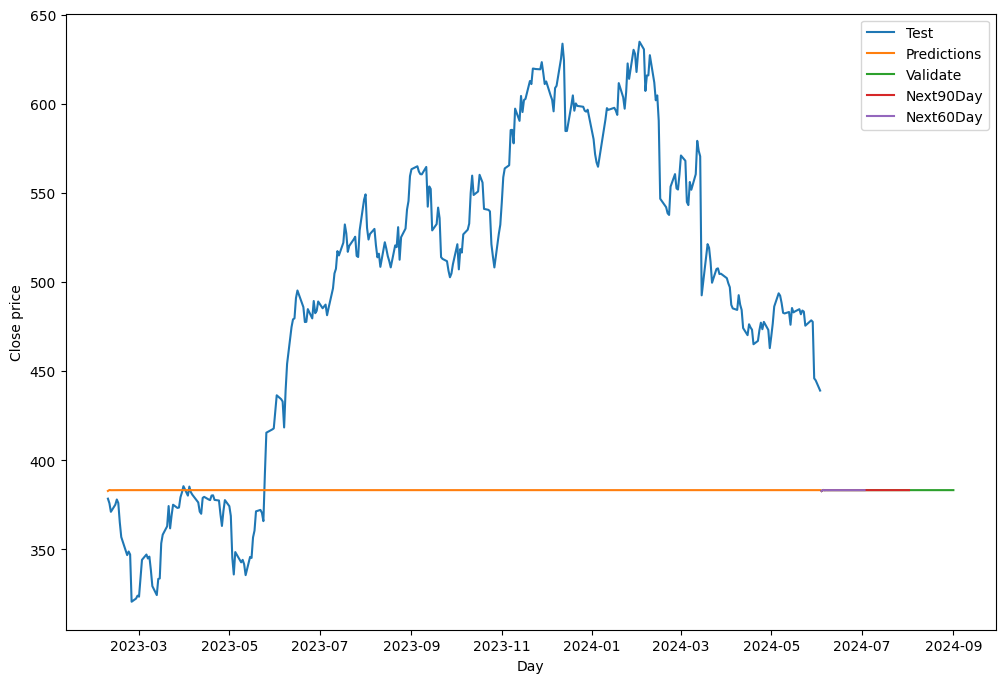

In [27]:
# 8.Vẽ hình test
import matplotlib.dates as mdates

plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])
plt.plot(data['Date'][train_size:], test_data['Close'])
plt.plot(data['Date'][train_size:], y_pred)
predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()

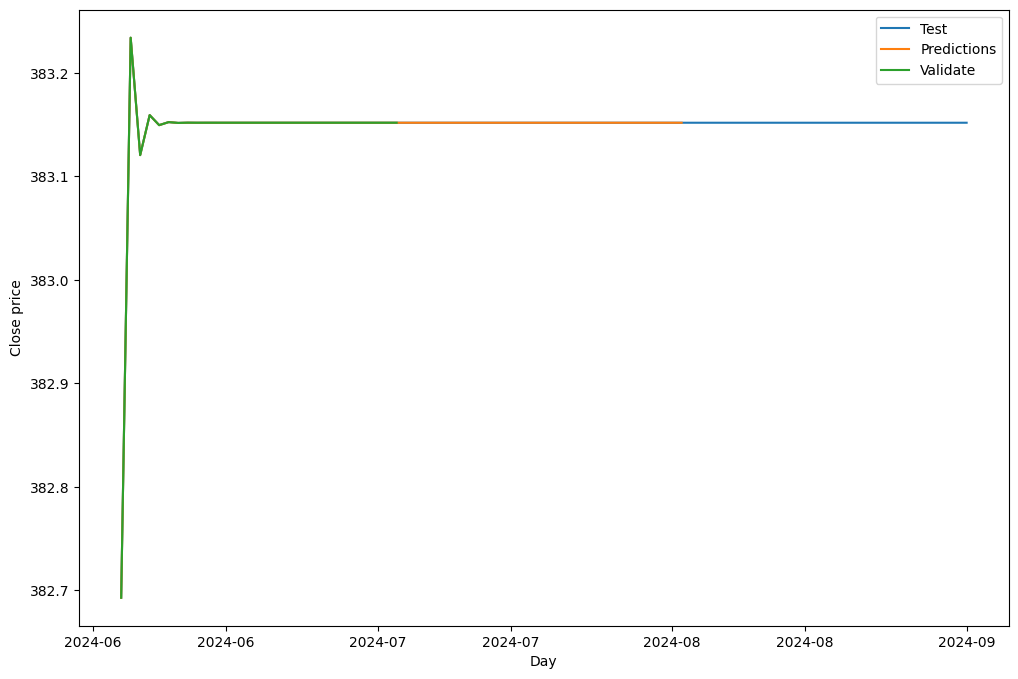

In [28]:
plt.figure(figsize=(12, 8))
data['Date'] = pd.to_datetime(data['Date'])

predict_data_index_90 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=90, freq='D')
predict_data_index_60 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=60, freq='D')
predict_data_index_30 = pd.bdate_range(start=data['Date'][len(data['Date'])-1] + pd.Timedelta(days=1), periods=30, freq='D')
plt.plot(predict_data_index_90 ,y_next_90_days)
plt.plot(predict_data_index_60 ,y_next_60_days)
plt.plot(predict_data_index_30 ,y_next_30_days)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
plt.xlabel('Day')
plt.ylabel('Close price')
plt.legend(['Test', 'Predictions','Validate','Next90Day', 'Next60Day', 'Next30Day'])
plt.show()